# Garden Street Capital Portfolio Optimization Tool

Portfolio Optimization is a tool that helps you find the best asset allocation according to your objectives. This portfolio optimizer tool supports 
* Maximizing a portfolio's Sharpe Ratio (i.e. Highest Return w/ Lowest Risk)
* Minimizing a portfolio's Risk

If you have any questions, please contact our Quantitative Analyst - Kaleb Tucker (704) 622 - 9621


In [126]:
# Import Dependencies
import os
import numpy as np
import pandas as pd
import yfinance as yf
!pip install PyPortfolioOpt
from pypfopt import EfficientFrontier, risk_models, expected_returns, CLA, plotting
from pypfopt import DiscreteAllocation


import warnings
warnings.filterwarnings("ignore")

In [139]:
ticker = input("What companies would you like to analyze? (i.e., SQ, VZ, AAPL)")
ticker = ticker.split(',')
ticker = [element.replace(" ","") for element in ticker]

What companies would you like to analyze? (i.e., SQ, VZ, AAPL)VZ, T, TMUS, COST, WMT, SQ, PYPL, BAC, GS, JPM, FB, AAPL, GOOGL, MSFT


In [140]:
portfolio = yf.download(ticker, start="2000-01-01", end="2020-12-31");

[*********************100%***********************]  14 of 14 completed


### Visualizing Prices

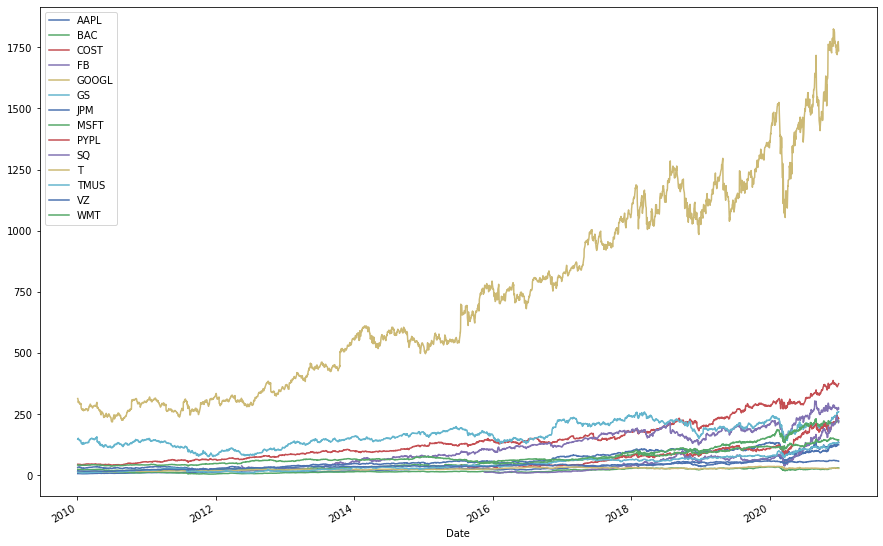

In [141]:
prices = portfolio["Adj Close"]
prices[prices.index >= "2010-01-01"].plot(figsize=(15,10));

## Expected Returns

We will calculate an estimated return for a particular set of securities using a statistical regression and historical pricing. Our calculations of estimated returns will leverage the Capital Asset Pricing Model (i.e., rfr + Equity Beta (mkt + rfr)).  

Below you will find an estimated return for each security within your portfolio. 

In [142]:
portfolio = portfolio['Adj Close']

In [143]:
mu = expected_returns.capm_return(portfolio)
mu

AAPL     0.160423
BAC      0.207047
COST     0.113392
FB       0.116181
GOOGL    0.128653
GS       0.180812
JPM      0.193442
MSFT     0.139564
PYPL     0.146443
SQ       0.196027
T        0.110448
TMUS     0.163720
VZ       0.101130
WMT      0.093089
Name: mkt, dtype: float64

## Portfolio Optimization

In [144]:
portval = input("How much cash do you have to invest? ")
portval = int(portval)

How much cash do you have to invest? 50000


### Maximum Returns while Reducing Risk

To maximize the Sharpe Ratio of the portfolio, we leverage the following:
* Expected Return of each security
* Standard Deviation of historical returns for each security, also considered "Risk"

Our goal is to maximize the expected return of the portfolio while minimizing the risk.

In [163]:
sigma = risk_models.sample_cov(prices)
ef = EfficientFrontier(mu, sigma)
weights = ef.max_sharpe()
outputs = ef.portfolio_performance(verbose = True, risk_free_rate = 0.01)

Expected annual return: 14.6%
Annual volatility: 22.2%
Sharpe Ratio: 0.61


In [164]:
latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portval, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
allocation1 = pd.DataFrame.from_dict(alloc, orient='index', columns=['Shares to Buy'])
allocation1['Total Amount'] = latest_prices * allocation1['Shares to Buy']
allocation1

Discrete allocation performed with $15.28 leftover


,Shares to Buy,Total Amount
AAPL,27,3610.440033
BAC,94,2818.119957
COST,12,4493.400146
FB,9,2446.829956
GOOGL,1,1736.250000
GS,13,3372.850159
JPM,46,5725.327713
PYPL,18,4167.179901
SQ,17,3757.679886
T,123,3443.346628


### Minimizing the  Volatility of Portfolio

To minimize the variance of the portfolio, we leverage the following:
* Standard Deviation of historical returns for each security, also considered "Risk"

Our only goal is to minimize the risk of the portfolio. 

In [165]:
ef2 = EfficientFrontier(mu, sigma)
weights2 = ef2.min_volatility()
outputs2 = ef2.portfolio_performance(verbose = True)

Expected annual return: 10.7%
Annual volatility: 18.0%
Sharpe Ratio: 0.48


In [166]:
latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da2 = DiscreteAllocation(weights2, latest_prices, total_portfolio_value=portval, short_ratio=0.3)
alloc2, leftover2 = da2.lp_portfolio()
print(f"Discrete allocation performed with ${leftover2:.2f} leftover")

allocation2 = pd.DataFrame.from_dict(alloc2, orient='index', columns=['Shares to Buy'])
allocation2['Total Amount'] = latest_prices * allocation1['Shares to Buy']
allocation2

Discrete allocation performed with $4.05 leftover


,Shares to Buy,Total Amount
COST,12,4493.400146
FB,21,2446.829956
GOOGL,3,1736.250000
PYPL,5,4167.179901
T,176,3443.346628
TMUS,4,3731.839966
VZ,223,6500.232494
WMT,105,4181.219788


## Interpretations

In [178]:
if(outputs[0] > outputs2[0]):
    print('The range of expected returns for the given portfolio is {}% and {}%.'.format(round(outputs2[0]*100,2), round(outputs[0]*100,2)))
else:
    print('The range of expected returns for the given portfolio is {}% and {}%.'.format(round(outputs[0]*100,2), round(outputs2[0]*100,2)))
    
    
if(outputs[1] > outputs2[1]):
    print('The range of annual volatility for the given portfolio is {}% and {}%.'.format(round(outputs2[1]*100,2), round(outputs[1]*100,2)))
else:
    print('The range of annual volatility for the given portfolio is {}% and {}%.'.format(round(outputs[1]*100,2), round(outputs2[1]*100,2)))


The range of expected returns for the given portfolio is 10.69% and 14.57%.
The range of annual volatility for the given portfolio is 18.03% and 22.17%.
